In [1]:
# %load assignment2.py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Look pretty...
matplotlib.style.use('ggplot')

## For this part of the lab, `scaleFeatures` is `True`

In [3]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [38]:
# TODO: Load up the dataset and remove any and all
# Rows that have a nan. You should be a pro at this
# by now ;-)
#
# .. your code here ..
df = pd.read_csv('Datasets/kidney_disease.csv')
print df.shape

(400, 26)


In [39]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [40]:
df.columns

Index([u'id', u'age', u'bp', u'sg', u'al', u'su', u'rbc', u'pc', u'pcc', u'ba',
       u'bgr', u'bu', u'sc', u'sod', u'pot', u'hemo', u'pcv', u'wc', u'rc',
       u'htn', u'dm', u'cad', u'appet', u'pe', u'ane', u'classification'],
      dtype='object')

In [41]:
df.dropna(axis=0, inplace=True)

In [42]:
print df.isnull().values.sum()
print df.shape

0
(158, 26)


In [43]:
# Create some color coded labels; the actual label feature
# will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

## Part 3.  

### 1. 

Instead of using an indexer to select just the bgr, rc, and wc, alter your assignment code to drop all the nominal features listed above. Be sure you select the right axis for columns and not rows, otherwise Pandas will complain!

In [44]:
nominal_features = ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
nominal_features

['id',
 'classification',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [47]:
df = df.drop(labels=nominal_features, axis=1)

In [48]:
df.shape

(158, 14)

### 2.
Right after you print out your dataset's dtypes, add an exit() so you can inspect the results. Does everything look like it should / properly numeric? If not, make code changes to coerce the remaining column(s).

In [49]:
[(c, df[c].dtype) for c in df.columns]

[('age', dtype('float64')),
 ('bp', dtype('float64')),
 ('sg', dtype('float64')),
 ('al', dtype('float64')),
 ('su', dtype('float64')),
 ('bgr', dtype('float64')),
 ('bu', dtype('float64')),
 ('sc', dtype('float64')),
 ('sod', dtype('float64')),
 ('pot', dtype('float64')),
 ('hemo', dtype('float64')),
 ('pcv', dtype('O')),
 ('wc', dtype('O')),
 ('rc', dtype('O'))]

In [50]:
df.pcv.head()

3     32
9     29
11    32
14    16
20    24
Name: pcv, dtype: object

In [53]:
df.pcv = df.pcv.astype('int')

In [55]:
df.wc = df.wc.astype('int')

In [57]:
df.rc = df.rc.astype('float')

In [58]:
[(c, df[c].dtype) for c in df.columns]

[('age', dtype('float64')),
 ('bp', dtype('float64')),
 ('sg', dtype('float64')),
 ('al', dtype('float64')),
 ('su', dtype('float64')),
 ('bgr', dtype('float64')),
 ('bu', dtype('float64')),
 ('sc', dtype('float64')),
 ('sod', dtype('float64')),
 ('pot', dtype('float64')),
 ('hemo', dtype('float64')),
 ('pcv', dtype('int64')),
 ('wc', dtype('int64')),
 ('rc', dtype('float64'))]

In [60]:
# TODO: This method assumes your dataframe is called df. If it isn't,
# make the appropriate changes. Don't alter the code in scaleFeatures()
# just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)

New Variances:
age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   8.432074e-17  5.846238e-16 -1.304161e-15 -1.349132e-16 -2.248553e-17   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

      

In [61]:
# TODO: Run PCA on your dataset and reduce it to 2 components
# Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..

In [62]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, n_components=2, whiten=False)

In [63]:
T = pca.transform(df)

Features by importance:
[(3.104322604314453, 'sc'), (3.068221347434883, 'bgr'), (3.062073035813361, 'pcv'), (3.0492691739727444, 'hemo'), (3.0492140350096446, 'bu'), (3.002325956415049, 'al'), (2.809925050151633, 'su'), (2.769784621968718, 'sg'), (2.728482669524992, 'rc'), (2.3670226926502473, 'sod'), (1.9510689015492932, 'age'), (1.8925913482908918, 'wc'), (1.5984059017935532, 'bp'), (0.9859078731528204, 'pot')]


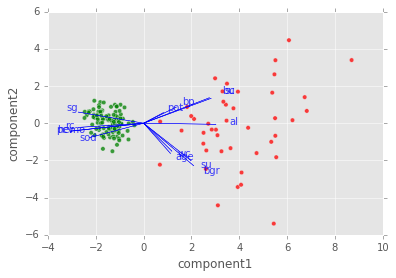

In [64]:
# Plot the transformed data as a scatter plot. Recall that transforming
# the data will result in a NumPy NDArray. You can either use MatPlotLib
# to graph it directly, or you can convert it to DataFrame and have pandas
# do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in
# Module4/assignment1.py, this time we'll convert to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we
# are in P.C. space, so we'll just define the coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

### Question

After adding in all of numeric columns, do the green, non-chronic kidney disease patients group closer together than before?

> Clearly yes they do!